In [1]:
import numpy as np
from scipy import constants
import matplotlib.pyplot as plt

gasses = { 
    "air": {
        "c_p": 1.005e3, # J/kgK
        "c_v": 0.718e3, # J/kgK
        "m_mol": 28.949e-3 , # kg/mol
    },
}

gas = gasses['air']
temp_r = 273.15+25
r_s = constants.R / gas['m_mol']

# Berechnungen zu Impact Teststand

## Aufgabenstellung

Es gilt einen Teststand für das Aufprallverhalten von heißgepressten Kunststoff Briketts zu entwerfen.

Die Briketts sind 120mm im durchmesser und 300mm lang. Sie treffen mit 100m/s auf.

## Lauflänge


In [2]:
sample_d = 0.2 #m 
sample_l = 0.3 #m 
sample_vel = 100 #m/s
sample_m = 6 #kg


chamber_p = 20e5 # Pa 

sample_a = (sample_d/2)**2 * np.pi
sample_v = sample_a * sample_l
density = sample_m / sample_v #kg/m³
e_kin = sample_m * sample_vel**2 / 2
print(f"Probenenergie: {e_kin/1000:.0f} kJ")

Probenenergie: 30 kJ


$W = -\int_{V_0}^{V_1} p \, dV = -p \Delta V = -p A \Delta L$

$W = E_{kin}$

$V_c = -\frac{E_{kin}}{p_c}$

In [3]:
chamber_v = e_kin/ chamber_p
# chamber_v = 0.05
print(f"Chamber Volume = {chamber_v*1000:.1f} l")

Chamber Volume = 15.0 l


Mitrechnung der Beschleunigung des Gases in die kinetische Energie:

$$E_{kin, Gas} = \frac{1}{2} \int m_g v_{x_g}^2$$
Balistics, pp.66 löst dies auf: 
$$E_{kin, Gas} = \frac{1}{6} m_g v_{sample}^2$$

In [4]:
m_g = chamber_v*chamber_p / (r_s * temp_r)
print(f"Gas-Masse = {m_g:.3f} kg = {m_g / (sample_m+m_g) *100:.2f} % der Systemmasse")

# e_kin = (sample_m * sample_vel**2 / 2) + (m_g * sample_vel**2 /6)
# print(f"kinetische System-energie = {e_kin:.0f} J")

Gas-Masse = 0.350 kg = 5.52 % der Systemmasse


## isothermer Ansatz

Ausgangsenergie in Kammer:
$ p_0 V_0 = E_{pot}$

$p s A = const$

$p(s) = \frac{p_0 V_0}{A s} = \frac{E_{pot}}{A} \frac{1}{s}$

Fiktive Kammerlänge $l_f = \frac{V_c}{A}$ für einen konstanten Rohrsurchmesser. Die Probe befindet sich also an $s=l_f$ eines fiktiven Laufes mit Kammerdruck $p$ hinter sich.

$W = \int p \, dV = \int_{l_f}^{L+l_f} p(s) A \, ds =  \int_{l_f}^{L+l_f} E_{pot} \frac{1}{s} \, ds$

$W = E_{pot} \left[\ln(L+l_f) - \ln(l_f)\right]$

$W = E_{pot} \ln(\frac{L+l_f}{l_f}) = E_{kin}$

$L =l_f \exp\left(\frac{E_{kin}}{E_{pot}} \right) - l_f$

$L =l_f (\exp\left(\frac{E_{kin}}{E_{pot}} \right) - 1)$

In [5]:
e_pot = chamber_p * chamber_v
print(f"p V = {e_pot} J")
l_f = chamber_v / sample_a
print(f"l_f = V_c / A = {l_f:.3f} m")
barrel_l = l_f * np.exp(e_kin /  e_pot)-l_f
print(f"Lauflänge = {barrel_l:.3f} m")

p V = 30000.0 J
l_f = V_c / A = 0.477 m
Lauflänge = 0.820 m


## adiabatischer Ansatz

$$Q = \Delta U + W$$
Wobei Q = 0, da es ein verbrennungsfreier Ablauf ist.

Nun können wir die ideale Gasgleichung in das Integral der Arbeit einsetzen:
$$pV = n\mathfrak{R}T = m_gR_sT $$

$$W = \int p \, dV = \int m_gR_sT \, \frac{dV}{V}$$

da es sich um ein adiablitsches System handelt ist die absolute Temperatur abhängig vom Volumen:
$$T = T_0 \left(\frac{V_{c}}{V}\right)^{(\gamma - 1)}$$
wobei $\gamma$ das spezifische Wärmeverhältnis $\frac{c_p}{c_v}$ist.  Das führt zu einer Vereinfachung des Intergals:

$$W = m_gR_sT_0V_c^{(\gamma -1)} \int_{V_c}^{V} V^{-\gamma} dV$$

unter Annahme eines zylindrischen Laufs mit konstantem Durchmesser und einer Fictiven Kammerlänge $l_f = \frac{V_c}{A}$ kann man das Integral auf den Weg reduzieren:
$$W = m_gR_sT_0l_f^{(\gamma -1)} \int_{0}^{L} \left(l_f + x\right)^{-\gamma} \,dx$$
$$W = \frac{m_gR_sT_0l_f^{(\gamma -1)}}{1-\gamma} \left[\left(l_f  + L\right)^{1-\gamma} - \left(l_f  \right)^{1-\gamma}\right]$$

die errechnete Arbeit kann man wieder der kinetischen energie gleichsetzen
$$E_{kin} = W$$
$$\frac{m v_0^2}{2} = \frac{m_gR_sT_0l_f^{(\gamma -1)}}{1-\gamma} \left[\left(l_f  + L\right)^{1-\gamma} - l_f^{1-\gamma}\right]$$

Diesen Zusammenhang kann man nu nach beliben umformen um zB die mundungsgeschwindigkeit bei bekannter Lauflänge und InnenDruck zu errechnen, oder in diesem Fall für die benötigte Lauflänge bei gegebenen Anfangsdruck und gewünschter Mündungsenergie:
$$L = \left[E_{kin}\cdot\frac{1-\gamma}{m_gR_sT_0l_f^{(\gamma -1)}}+l_f^{1-\gamma}\right]^\frac{1}{1-\gamma} -  l_f$$
$$L = \left[\frac{E_{kin}}{E_{pot}}\cdot\frac{1-\gamma}{l_f^{(\gamma -1)}}+l_f^{1-\gamma}\right]^\frac{1}{1-\gamma} -  l_f$$


In [6]:
gamma = gas['c_p']/gas['c_v']
print(f"γ = {gamma}")

l_f = chamber_v / sample_a
const = chamber_v*chamber_p *(l_f**(gamma-1)) / (1-gamma)
L = (e_kin/const + l_f**(1-gamma))**(1/(1-gamma)) - l_f

print(f"Lauflänge L = {L:.3f}")

γ = 1.3997214484679665
Lauflänge L = 1.234


In [7]:
l_f * ((e_kin/e_pot * (1-gamma) +1)**(1/(1-gamma)) -1)


1.2343053902013508

Reibungsarbeit

$$F_R = \mu \cdot F_n$$
$$W_R = \int F_R \, ds$$

Annahme: $F_n$ ist unabhängig vom Kammerduck

$$W_R = F_R \cdot s$$

In [8]:
mu = 0.04
f_n = 100000# N compression force of briquette in barrel
L = ((e_kin)/const + l_f**(1-gamma))**(1/(1-gamma)) - l_f

print(f"Lauflänge L = {L:f}")

Lauflänge L = 1.234305


L = 1.234
W(x=1.234, p=2e+06) = 30000.000
p(x=1.234, p=2e+06) = 1.20e+06
V(x=1.234, p=2e+06) = 5.38e-02
ΔT(x=1.234, p=2e+06) = 178.97
94562.17620021079


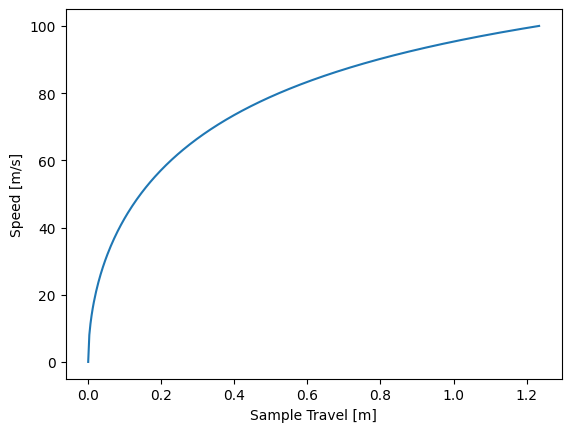

In [9]:
def work(x):
    return const *((l_f + x)**(1-gamma) - l_f**(1-gamma))

def vel(x):
    return np.sqrt(2*work(x) /sample_m)

def vol(x):
    return chamber_v + sample_a*x

t_0 = 273.15+25

def temp(x):
    return t_0 * (chamber_v / vol(x))**(gamma-1)

def pres(x):
    return e_pot * (chamber_v / vol(x))**(gamma-1) / chamber_v
    

print(f"L = {L:.3f}")

l_v = 3
print(f"W(x={L:.3f}, p={chamber_p:.0e}) = {work(L):.3f}")
print(f"p(x={L:.3f}, p={chamber_p:.0e}) = {pres(L):.2e}")
print(f"V(x={L:.3f}, p={chamber_p:.0e}) = {vol(L):.2e}")
print(f"ΔT(x={L:.3f}, p={chamber_p:.0e}) = { temp(L):.2f}")

print(e_kin + vol(L)*pres(L))


l_array = np.linspace(0,L,400)
plt.plot(l_array, vel(l_array))
plt.ylabel('Speed [m/s]')
plt.xlabel('Sample Travel [m]')
plt.show()

## Wandstärke - Kesselgleichung

Gültig für $t \ll r$

Wöhlerkurven!

In [10]:
sig_streck = 175e6 #Pa
sig_zul = 25e6
sicherheit = 2

$$\sigma_t = \frac{p\cdot d_m}{2\cdot s}$$

$$\sigma_a = \frac{p\cdot d_m}{4\cdot s}$$

$$s_{min} = \frac{p \cdot d_m}{2 \cdot \sigma_{zul}}$$

In [11]:
s_min_l = chamber_p * (sample_d) / (2 * sig_zul * sicherheit - chamber_p/2)
print(f"mindest wandstärke lauf: {s_min_l*1000:.1f} mm")

chamber_l = .4
chamber_d = np.sqrt(4*chamber_v/(chamber_l*np.pi))
s_min_c = chamber_p * (chamber_d) / (2 * sig_zul * sicherheit - chamber_p/2)
print(f"mindest wandstärke kammer: {s_min_c*1000:.1f} mm")


mindest wandstärke lauf: 4.0 mm
mindest wandstärke kammer: 4.4 mm


### Risikoanalyse / Gefahren
- Entladung mit Person zwischen Apparat und Endstopp
- Entladen im geöffneten Zustand
- Entladen ohne Beton Platte -> dicke Backplate
- Versagen von druckführenden Bauteilen
- Einklemmen / Einzwicken in Mechanik
- Stromstoß an Elektronik
- Falsches Beladen